In [2]:
import os
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, MaxPooling2D, Flatten,Conv2D,Reshape, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import losses
from tensorflow.keras.metrics import Recall, Precision
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shutil
import sys
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import  preprocess_input
from keras.utils import to_categorical
import os
import cv2 as cv
from sklearn.metrics import roc_auc_score
#import drive
from tensorflow.keras.utils import image_dataset_from_directory
from google.colab import drive
from sklearn.utils import shuffle
drive.mount('/content/drive')
print ('modules loaded')

Mounted at /content/drive
modules loaded


In [3]:
train_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Train"
test_dir =  "/content/drive/MyDrive/Cropped_Rf_data_resolution/Test"
val_dir =  "/content/drive/MyDrive/Cropped_Rf_data_resolution/Val"

from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.preprocessing import LabelEncoder

batch_size = 32
img_size = (224, 224)
train_dataset = image_dataset_from_directory(directory = train_dir,
                                       labels = "inferred",
                                       label_mode="categorical",
                                       color_mode = "rgb",
                                       batch_size = 32,
                                       image_size = img_size,
                                       shuffle = True,


                                       seed = 30,
                                      )
val_dataset = image_dataset_from_directory(directory = val_dir,
                                           labels = "inferred",
                                           label_mode="categorical",
                                           color_mode = "rgb",
                                           batch_size = 32,
                                           image_size = img_size,
                                           shuffle = True,


                                           seed = 30,
                                           )

test_dataset = image_dataset_from_directory(directory = test_dir,
                                            labels = "inferred",
                                            label_mode="categorical",
                                            color_mode = "rgb",
                                            image_size = img_size,
                                            shuffle = False
                                            )

Found 1357 files belonging to 4 classes.
Found 273 files belonging to 4 classes.
Found 184 files belonging to 4 classes.


In [4]:
!pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

# Define input shape and number of classes
img_shape = (224, 224, 3)
num_classes = 4

# Build the CNN model
model = models.Sequential([
    # Convolutional Layers
    layers.Conv2D(144, (3, 3), activation='relu', input_shape=img_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(192, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(176, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(208, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(192, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flattening Layer
    layers.Flatten(),

    # Dropout Layer
    layers.Dropout(0.3),

    # Fully Connected (Dense) Layers
    layers.Dense(144, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(192, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(176, activation='relu', kernel_regularizer=regularizers.l2(0.001)),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy", tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")]
)

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 144)       │           4,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 144)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 192)       │         249,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 176)         │         304,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 176)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 208)         │         329,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 208)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 192)         │         359,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 144)                 │         691,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 192)                 │          27,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 176)                 │          33,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             708 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,000,516 (7.63 MB)

 Trainable params: 2,000,516 (7.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define EarlyStopping & ModelCheckpoint
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model.keras", save_best_only=True)

# Train the model
history = model.fit(
    train_dataset,
    epochs=70,
    validation_data=val_dataset,
    callbacks=[checkpoint_cb, stop_early]
)



NameError: name 'model' is not defined

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_dataset)

# Print evaluation metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8728 - loss: 0.8630 - precision: 0.8722 - recall: 0.8678
Test Accuracy: 0.8859
Test Precision: 0.8852
Test Recall: 0.8804


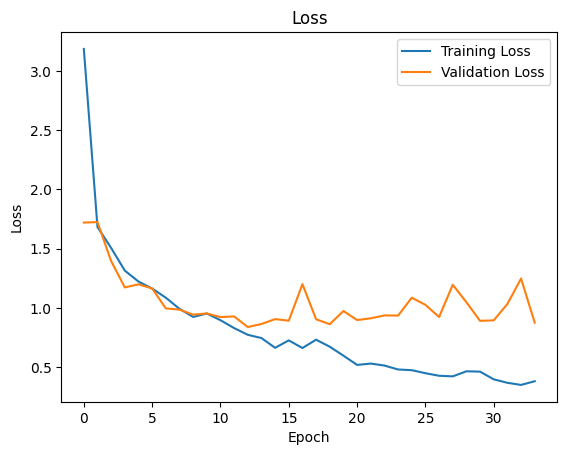

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

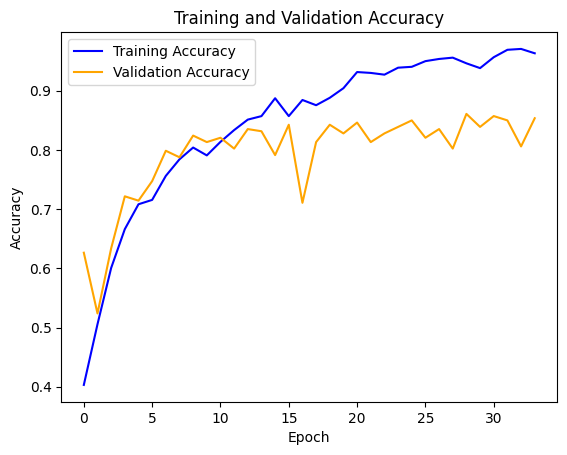

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get model predictions (probabilities)
y_pred = model.predict(test_dataset)

# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Extract true labels from test dataset
y_test_classes = np.concatenate([np.argmax(y, axis=1) for _, y in test_dataset])

# Compute confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_mat)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step
Confusion Matrix:
 [[14  3  1  0]
 [ 4 71  3  2]
 [ 0  2 22  0]
 [ 1  4  1 56]]


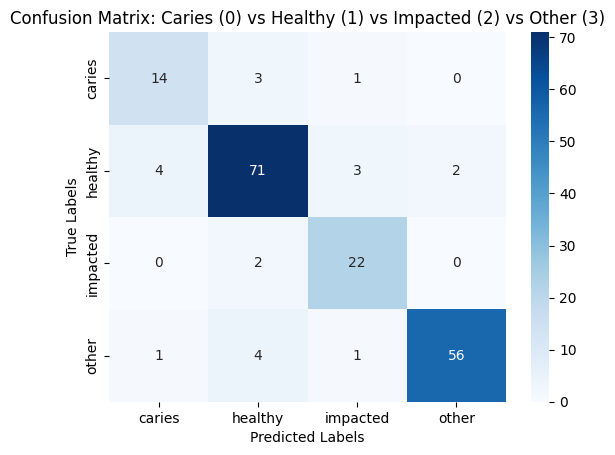

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct class names (assuming they correspond to your labels)
class_names = ['caries', 'healthy', 'impacted', 'other']  # Add the missing class

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g', xticklabels=class_names, yticklabels=class_names)

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Caries (0) vs Healthy (1) vs Impacted (2) vs Other (3)")

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Loop through the test dataset to extract ground truth and predictions
for images, labels in test_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot labels to class indices
    y_pred.extend(np.argmax(model.predict(images), axis=1))  # Get predicted class indices

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['caries', 'healthy', 'impacted', 'other'])

# Print classification report
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
              precision    recall  f1-score   support

      caries       0.74      0.78      0.76        18
     healthy       0.89      0.89      0.89        80
    impacted       0.81      0.92      0.86        24
       other       0.97      0.90      0.93        62

    accuracy                           0.89       184
   macro avg       0.85      0.87      0.86       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
model.save('model.h5')

Resnet_50

In [ ]:
# ============ 1. Mount Google Drive ============
from google.colab import drive
import os
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import RMSprop

drive.mount('/content/drive')

# ============ 2. Define Paths ============
project_name = "ResNet50_Keras_Tuning"
drive_path = "/content/drive/MyDrive"
project_path = os.path.join(drive_path, project_name)
checkpoint_dir = os.path.join(project_path, "checkpoints")
os.makedirs(checkpoint_dir, exist_ok=True)

# ============ 3. Image Input ============
img_shape = (224, 224, 3)

# ============ 4. Build Model Function ============
def build_model(hp):
    model = models.Sequential()
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        input_shape=img_shape,
        pooling='max',
        weights='imagenet'
    )
    for layer in base_model.layers:
        layer.trainable = False
    model.add(base_model)
    model.add(layers.Flatten())

    model.add(layers.Dropout(hp.Float("dropout", 0.2, 0.4, step=0.1)))

    for i in range(hp.Int("num_dense_layers", 1, 5)):
        model.add(layers.Dense(
            units=hp.Int(f"dense_{i}_units", 16, 512, step=16),
            activation="relu",
            kernel_regularizer=regularizers.l2(0.001)
        ))

    model.add(layers.Dense(4, activation="softmax"))

    model.compile(
        optimizer=RMSprop(learning_rate=hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="categorical_crossentropy",
        metrics=["accuracy", tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")]
    )

    return model

# ============ 5. Resume Trial Count Logic ============
def get_existing_trials(checkpoint_dir):
    trial_files = [f for f in os.listdir(checkpoint_dir) if f.endswith(".keras")]
    return len(trial_files)

completed_trials = get_existing_trials(checkpoint_dir)
max_trials = 100
remaining_trials = max_trials - completed_trials
print(f"✅ Completed Trials: {completed_trials}, Remaining Trials: {remaining_trials}")

# ============ 6. Initialize Tuner ============
tuner = kt.BayesianOptimization(
    build_model,
    objective="val_accuracy",
    max_trials=max_trials,
    executions_per_trial=2,
    directory=project_path,
    project_name=project_name,
    overwrite=False  # Keep existing tuning history
)

# ============ 7. Custom Callback (Only Save if val_accuracy Improves) ============
class TrialCheckpointCallback(tf.keras.callbacks.Callback):
    def __init__(self, checkpoint_dir):
        super().__init__()
        self.checkpoint_dir = checkpoint_dir
        self.best_val_acc = 0.0

    def on_trial_end(self, trial, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc and val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            trial_id = trial.trial_id.replace("trial_", "")
            filename = f"model_trial_{trial_id}_valacc_{val_acc:.4f}.keras"
            filepath = os.path.join(self.checkpoint_dir, filename)
            self.model.save(filepath)
            print(f"✅ Saved (val_accuracy improved): {filename}")
        else:
            print("⚠️ No improvement in val_accuracy. Checkpoint not saved.")

# ============ 8. Callbacks ============
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, verbose=1)
trial_checkpoint_cb = TrialCheckpointCallback(checkpoint_dir=checkpoint_dir)

# ============ 9. Start Tuning Search ============
if remaining_trials > 0:
    tuner.search(
        train_dataset,
        epochs=70,
        validation_data=val_dataset,
        callbacks=[stop_early, trial_checkpoint_cb]
    )
else:
    print("✅ All 100 trials already completed.")

# ============ 10. Load Best Model ============
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
ResNet50_model = tuner.hypermodel.build(best_hps)
ResNet50_model.summary()


Trial 100 Complete [00h 03m 24s]
val_accuracy: 0.8498168587684631

Best val_accuracy So Far: 0.8846153914928436
Total elapsed time: 06h 04m 35s


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 416)                 │         852,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         213,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,187,188 (96.08 MB)

 Trainable params: 1,599,476 (6.10 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Define EarlyStopping & ModelCheckpoint
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ResNet50_model.keras", save_best_only=True)

# Train the model
history = ResNet50_model.fit(
    train_dataset,
    epochs=70,
    validation_data=val_dataset,
    callbacks=[checkpoint_cb, stop_early]
)



Epoch 1/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 35s 459ms/step - accuracy: 0.4533 - loss: 3.7829 - precision: 0.4941 - recall: 0.2808 - val_accuracy: 0.6227 - val_loss: 3.1228 - val_precision: 0.7151 - val_recall: 0.4872
Epoch 2/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6448 - loss: 3.0717 - precision: 0.7236 - recall: 0.5125 - val_accuracy: 0.6300 - val_loss: 3.1211 - val_precision: 0.6342 - val_recall: 0.5971
Epoch 3/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6949 - loss: 2.9105 - precision: 0.7397 - recall: 0.6206 - val_accuracy: 0.6923 - val_loss: 2.8385 - val_precision: 0.7177 - val_recall: 0.6520
Epoch 4/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7727 - loss: 2.7449 - precision: 0.8010 - recall: 0.7188 - val_accuracy: 0.6996 - val_loss: 2.8935 - val_precision: 0.7617 - val_recall: 0.6557
Epoch 5/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7759 - loss: 2.6758 - precision: 0.8139 - recall: 0.7444 - val_accuracy: 0.7619 - val_loss: 2.690

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc, test_precision, test_recall = ResNet50_model.evaluate(test_dataset)

# Print evaluation metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.7911 - loss: 2.6141 - precision: 0.7993 - recall: 0.7875
Test Accuracy: 0.8587
Test Precision: 0.8626
Test Recall: 0.8533


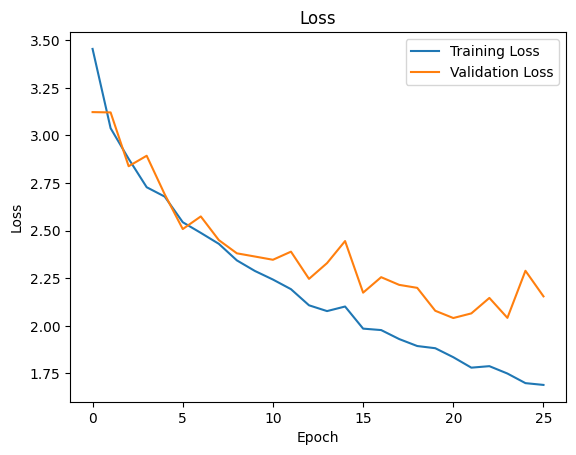

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

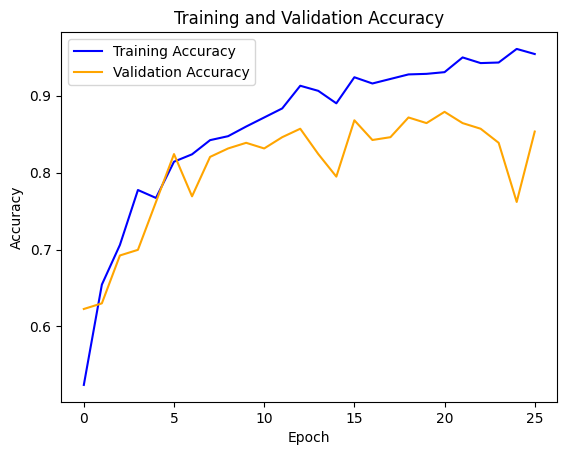

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get model predictions (probabilities)
y_pred = ResNet50_model.predict(test_dataset)

# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Extract true labels from test dataset
y_test_classes = np.concatenate([np.argmax(y, axis=1) for _, y in test_dataset])

# Compute confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_mat)


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Confusion Matrix:
 [[ 6  5  2  5]
 [ 1 71  1  7]
 [ 0  2 20  2]
 [ 0  1  0 61]]


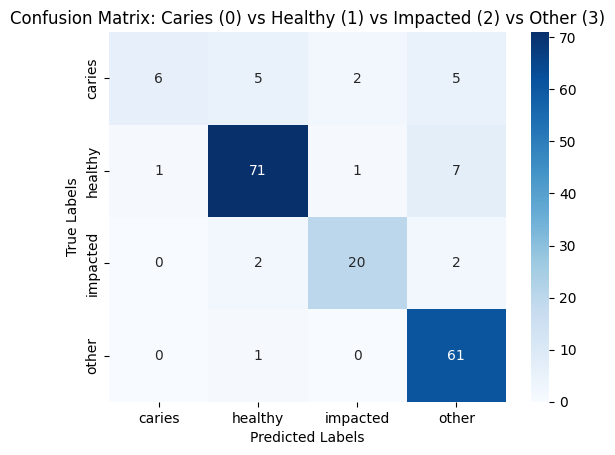

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct class names (assuming they correspond to your labels)
class_names = ['caries', 'healthy', 'impacted', 'other']  # Add the missing class

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g', xticklabels=class_names, yticklabels=class_names)

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Caries (0) vs Healthy (1) vs Impacted (2) vs Other (3)")

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Loop through the test dataset to extract ground truth and predictions
for images, labels in test_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot labels to class indices
    y_pred.extend(np.argmax(ResNet50_model.predict(images), axis=1))  # Get predicted class indices

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['caries', 'healthy', 'impacted', 'other'])

# Print classification report
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
              precision    recall  f1-score   support

      caries       0.86      0.33      0.48        18
     healthy       0.90      0.89      0.89        80
    impacted       0.87      0.83      0.85        24
       other       0.81      0.98      0.89        62

    accuracy                           0.86       184
   macro avg       0.86      0.76      0.78       184
weighted avg       0.86      0.86      0.85       184



In [ ]:
import os
from tensorflow.keras.models import save_model

# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

# Define a permanent save path in your Google Drive
save_path = "/content/drive/MyDrive/ResNet50_Final_Training"
os.makedirs(save_path, exist_ok=True)

# Save the trained model directly to Drive
model_name = "ResNet50_model.h5"
ResNet50_model.save(os.path.join(save_path, model_name))

print(f"✅ Model saved to: {save_path}/{model_name}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model saved to: /content/drive/MyDrive/ResNet50_Final_Training/ResNet50_model.h5


# InceptionV3

In [ ]:
# ============ 1. Mount Google Drive ============
from google.colab import drive
import os
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import RMSprop

drive.mount('/content/drive')

# ============ 2. Define Paths ============
project_name = "InceptionV3_Keras_Tuning"
drive_path = "/content/drive/MyDrive"
project_path = os.path.join(drive_path, project_name)
checkpoint_dir = os.path.join(project_path, "checkpoints")
os.makedirs(checkpoint_dir, exist_ok=True)

# ============ 3. Image Input ============
img_shape = (299, 299, 3)  # InceptionV3 default input size

# ============ 4. Build Model Function ============
def build_model(hp):
    model = models.Sequential()
    base_model = tf.keras.applications.InceptionV3(
        include_top=False,
        input_shape=img_shape,
        pooling='avg',  # Global average pooling is better for Inception
        weights='imagenet'
    )
    for layer in base_model.layers:
        layer.trainable = False
    model.add(base_model)

    model.add(layers.Dropout(hp.Float("dropout", 0.2, 0.4, step=0.1)))

    for i in range(hp.Int("num_dense_layers", 1, 5)):
        model.add(layers.Dense(
            units=hp.Int(f"dense_{i}_units", 16, 512, step=16),
            activation="relu",
            kernel_regularizer=regularizers.l2(0.001)
        ))

    model.add(layers.Dense(4, activation="softmax"))

    model.compile(
        optimizer=RMSprop(learning_rate=hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="categorical_crossentropy",
        metrics=["accuracy", tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")]
    )

    return model

# ============ 5. Resume Trial Count Logic ============
def get_existing_trials(checkpoint_dir):
    trial_files = [f for f in os.listdir(checkpoint_dir) if f.endswith(".keras")]
    return len(trial_files)

completed_trials = get_existing_trials(checkpoint_dir)
max_trials = 100
remaining_trials = max_trials - completed_trials
print(f"✅ Completed Trials: {completed_trials}, Remaining Trials: {remaining_trials}")

# ============ 6. Initialize Tuner ============
tuner = kt.BayesianOptimization(
    build_model,
    objective="val_accuracy",
    max_trials=max_trials,
    executions_per_trial=2,
    directory=project_path,
    project_name=project_name,
    overwrite=False
)

# ============ 7. Custom Callback (Only Save if val_accuracy Improves) ============
class TrialCheckpointCallback(tf.keras.callbacks.Callback):
    def __init__(self, checkpoint_dir):
        super().__init__()
        self.checkpoint_dir = checkpoint_dir
        self.best_val_acc = 0.0

    def on_trial_end(self, trial, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc and val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            trial_id = trial.trial_id.replace("trial_", "")
            filename = f"model_trial_{trial_id}_valacc_{val_acc:.4f}.keras"
            filepath = os.path.join(self.checkpoint_dir, filename)
            self.model.save(filepath)
            print(f"✅ Saved (val_accuracy improved): {filename}")
        else:
            print("⚠️ No improvement in val_accuracy. Checkpoint not saved.")

# ============ 8. Callbacks ============
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, verbose=1)
trial_checkpoint_cb = TrialCheckpointCallback(checkpoint_dir=checkpoint_dir)

# ============ 9. Start Tuning Search ============
if remaining_trials > 0:
    tuner.search(
        train_dataset,
        epochs=70,
        validation_data=val_dataset,
        callbacks=[stop_early, trial_checkpoint_cb]
    )
else:
    print("✅ All 100 trials already completed.")

# ============ 10. Load Best Model ============
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
InceptionV3_model = tuner.hypermodel.build(best_hps)
InceptionV3_model.summary()


Trial 100 Complete [00h 02m 28s]
val_accuracy: 0.7051282227039337

Best val_accuracy So Far: 0.7655677795410156
Total elapsed time: 08h 07m 17s


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2048)                │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,853,924 (87.18 MB)

 Trainable params: 1,051,140 (4.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Define EarlyStopping & ModelCheckpoint
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("InceptionV3_model.keras", save_best_only=True)

# Train the model
history = InceptionV3_model.fit(
    train_dataset,
    epochs=70,
    validation_data=val_dataset,
    callbacks=[checkpoint_cb, stop_early]
)



Epoch 1/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 32s 432ms/step - accuracy: 0.3603 - loss: 17.6392 - precision: 0.3602 - recall: 0.3593 - val_accuracy: 0.5238 - val_loss: 8.4854 - val_precision: 0.5238 - val_recall: 0.5238
Epoch 2/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.4908 - loss: 8.9612 - precision: 0.4916 - recall: 0.4889 - val_accuracy: 0.5385 - val_loss: 10.2830 - val_precision: 0.5385 - val_recall: 0.5385
Epoch 3/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.5311 - loss: 7.4847 - precision: 0.5322 - recall: 0.5295 - val_accuracy: 0.6190 - val_loss: 4.5397 - val_precision: 0.6190 - val_recall: 0.6190
Epoch 4/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.5159 - loss: 7.2285 - precision: 0.5171 - recall: 0.5099 - val_accuracy: 0.5861 - val_loss: 5.6485 - val_precision: 0.5882 - val_recall: 0.5861
Epoch 5/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.5472 - loss: 5.6684 - precision: 0.5497 - recall: 0.5466 - val_accuracy: 0.6484 - val_loss: 4.3

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc, test_precision, test_recall = InceptionV3_model.evaluate(test_dataset)

# Print evaluation metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7135 - loss: 2.9991 - precision: 0.7236 - recall: 0.7135
Test Accuracy: 0.6141
Test Precision: 0.6209
Test Recall: 0.6141


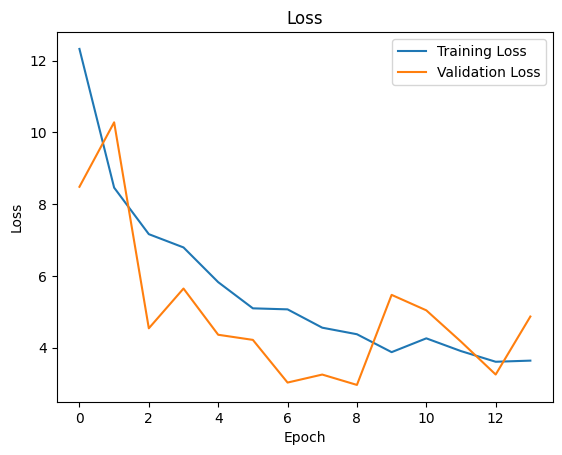

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

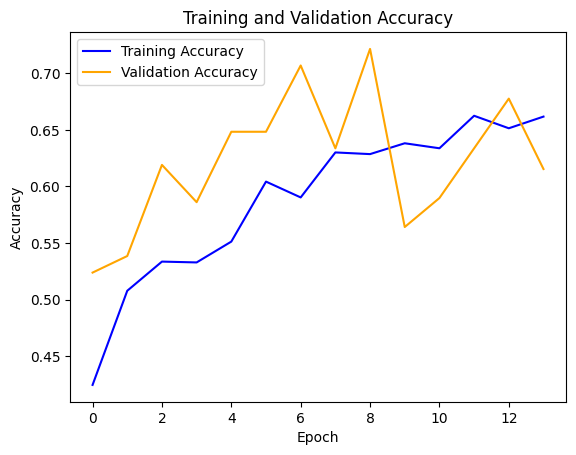

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get model predictions (probabilities)
y_pred = InceptionV3_model.predict(test_dataset)

# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Extract true labels from test dataset
y_test_classes = np.concatenate([np.argmax(y, axis=1) for _, y in test_dataset])

# Compute confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_mat)


6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Confusion Matrix:
 [[ 8  6  4  0]
 [ 2 74  4  0]
 [ 1  6 17  0]
 [ 7 31 10 14]]


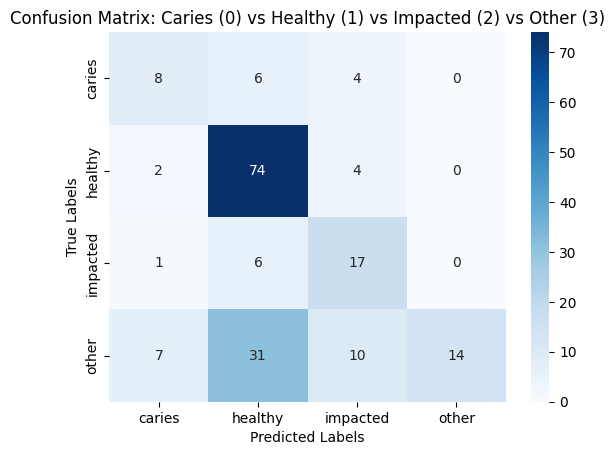

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct class names (assuming they correspond to your labels)
class_names = ['caries', 'healthy', 'impacted', 'other']  # Add the missing class

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g', xticklabels=class_names, yticklabels=class_names)

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Caries (0) vs Healthy (1) vs Impacted (2) vs Other (3)")

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Loop through the test dataset to extract ground truth and predictions
for images, labels in test_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot labels to class indices
    y_pred.extend(np.argmax(InceptionV3_model.predict(images), axis=1))  # Get predicted class indices

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['caries', 'healthy', 'impacted', 'other'])

# Print classification report
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
              precision    recall  f1-score   support

      caries       0.44      0.44      0.44        18
     healthy       0.63      0.93      0.75        80
    impacted       0.49      0.71      0.58        24
       other       1.00      0.23      0.37        62

    accuracy                           0.61       184
   macro avg       0.64      0.58      0.54       184
weighted avg       0.72      0.61      0.57       184



In [ ]:
#InceptionV3_model.save('InceptionV3_model.h5')
import os
from tensorflow.keras.models import save_model

# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

# Define a permanent save path in your Google Drive
save_path = "/content/drive/MyDrive/InceptionV3_Final_Training"
os.makedirs(save_path, exist_ok=True)

# Save the trained model directly to Drive
model_name = "InceptionV3_model.h5"
InceptionV3_model.save(os.path.join(save_path, model_name))

print(f"✅ Model saved to: {save_path}/{model_name}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model saved to: /content/drive/MyDrive/InceptionV3_Final_Training/InceptionV3_model.h5


In [ ]:
!ls /content/drive/MyDrive/DenseNet121_Keras_Tuning/checkpoints


# DenseNet121


In [ ]:
# ============ 1. Mount Google Drive ============
from google.colab import drive
import os
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import RMSprop

drive.mount('/content/drive')

# ============ 2. Define Paths ============
project_name = "DenseNet121_Keras_Tuning"
drive_path = "/content/drive/MyDrive"
project_path = os.path.join(drive_path, project_name)
checkpoint_dir = os.path.join(project_path, "checkpoints")
os.makedirs(checkpoint_dir, exist_ok=True)

# ============ 3. Image Input ============
img_shape = (224, 224, 3)

# ============ 4. Build Model Function ============
def build_model(hp):
    model = models.Sequential()
    base_model = tf.keras.applications.DenseNet121(
        include_top=False,
        input_shape=img_shape,
        pooling='avg',
        weights='imagenet'
    )
    for layer in base_model.layers:
        layer.trainable = False
    model.add(base_model)

    model.add(layers.Dropout(hp.Float("dropout", 0.2, 0.4, step=0.1)))

    for i in range(hp.Int("num_dense_layers", 1, 5)):
        model.add(layers.Dense(
            units=hp.Int(f"dense_{i}_units", 16, 512, step=16),
            activation="relu",
            kernel_regularizer=regularizers.l2(0.001)
        ))

    model.add(layers.Dense(4, activation="softmax"))

    model.compile(
        optimizer=RMSprop(learning_rate=hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="categorical_crossentropy",
        metrics=["accuracy", tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")]
    )
    return model

# ============ 5. Resume Trial Count Logic ============
def get_existing_trials(checkpoint_dir):
    return len([f for f in os.listdir(checkpoint_dir) if f.endswith(".keras")])

completed_trials = get_existing_trials(checkpoint_dir)
max_trials = 100
remaining_trials = max_trials - completed_trials
print(f"✅ Completed Trials: {completed_trials}, Remaining Trials: {remaining_trials}")

# ============ 6. Initialize Tuner ============
tuner = kt.BayesianOptimization(
    build_model,
    objective="val_accuracy",
    max_trials=max_trials,
    executions_per_trial=2,
    directory=project_path,
    project_name=project_name,
    overwrite=False
)

# ============ 7. Custom Callback ============
class TrialCheckpointCallback(tf.keras.callbacks.Callback):
    def __init__(self, checkpoint_dir):
        super().__init__()
        self.checkpoint_dir = checkpoint_dir
        self.best_val_acc = 0.0

    def on_trial_end(self, trial, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc and val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            trial_id = trial.trial_id.replace("trial_", "")
            filename = f"model_trial_{trial_id}_valacc_{val_acc:.4f}.keras"
            filepath = os.path.join(self.checkpoint_dir, filename)
            self.model.save(filepath)
            print(f"✅ Saved (val_accuracy improved): {filename}")
        else:
            print("⚠️ No improvement in val_accuracy. Checkpoint not saved.")

# ============ 8. Callbacks ============
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, verbose=1)
trial_checkpoint_cb = TrialCheckpointCallback(checkpoint_dir)

# ============ 9. Tuning ============
if remaining_trials > 0:
    tuner.search(
        train_dataset,
        epochs=70,
        validation_data=val_dataset,
        callbacks=[stop_early, trial_checkpoint_cb]
    )
else:
    print("✅ All 100 trials already completed.")

# ============ 10. Load Best Model ============
best_hps = tuner.get_best_hyperparameters(1)[0]
DenseNet_model = tuner.hypermodel.build(best_hps)
DenseNet_model.summary()


Trial 100 Complete [00h 03m 33s]
val_accuracy: 0.8131868243217468

Best val_accuracy So Far: 0.8223443329334259
Total elapsed time: 11h 18m 39s


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 480)            │       492,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         7,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,538,084 (28.76 MB)

 Trainable params: 500,580 (1.91 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
# Define EarlyStopping & ModelCheckpoint
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("DenseNet121_model.keras", save_best_only=True)

# Train the model
history = DenseNet_model.fit(
    train_dataset,
    epochs=70,
    validation_data=val_dataset,
    callbacks=[checkpoint_cb, stop_early]
)



Epoch 1/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 61s 864ms/step - accuracy: 0.3297 - loss: 2.2629 - precision: 0.4427 - recall: 0.0455 - val_accuracy: 0.4249 - val_loss: 2.0352 - val_precision: 0.6667 - val_recall: 0.0073
Epoch 2/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.4429 - loss: 2.0503 - precision: 0.6155 - recall: 0.0513 - val_accuracy: 0.3956 - val_loss: 1.9579 - val_precision: 0.7778 - val_recall: 0.1538
Epoch 3/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.4711 - loss: 1.9577 - precision: 0.6970 - recall: 0.1317 - val_accuracy: 0.5824 - val_loss: 1.9087 - val_precision: 0.9412 - val_recall: 0.1172
Epoch 4/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.5085 - loss: 1.9171 - precision: 0.7180 - recall: 0.1411 - val_accuracy: 0.6007 - val_loss: 1.8628 - val_precision: 0.8974 - val_recall: 0.1282
Epoch 5/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.5486 - loss: 1.8650 - precision: 0.7338 - recall: 0.1753 - val_accuracy: 0.5788 - val_loss: 1.813

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc, test_precision, test_recall = DenseNet_model.evaluate(test_dataset)

# Print evaluation metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.6243 - loss: 1.4225 - precision: 0.6273 - recall: 0.2167
Test Accuracy: 0.6576
Test Precision: 0.7639
Test Recall: 0.2989


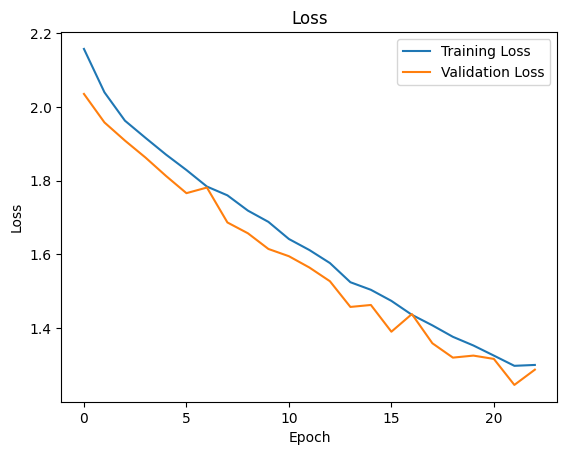

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

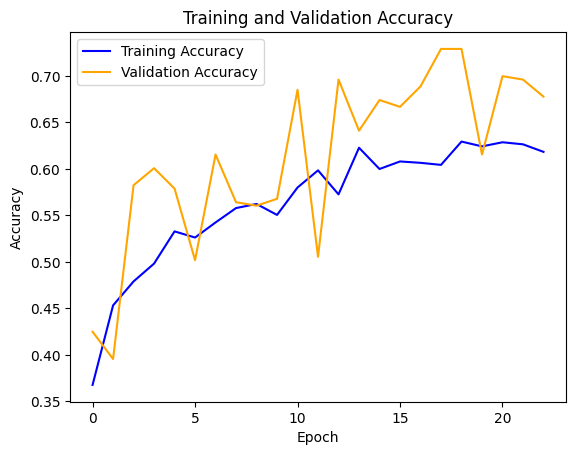

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get model predictions (probabilities)
y_pred = DenseNet_model.predict(test_dataset)

# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Extract true labels from test dataset
y_test_classes = np.concatenate([np.argmax(y, axis=1) for _, y in test_dataset])

# Compute confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_mat)


6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
Confusion Matrix:
 [[10  6  2  0]
 [11 48  9 12]
 [ 0  1 23  0]
 [ 0 19  3 40]]


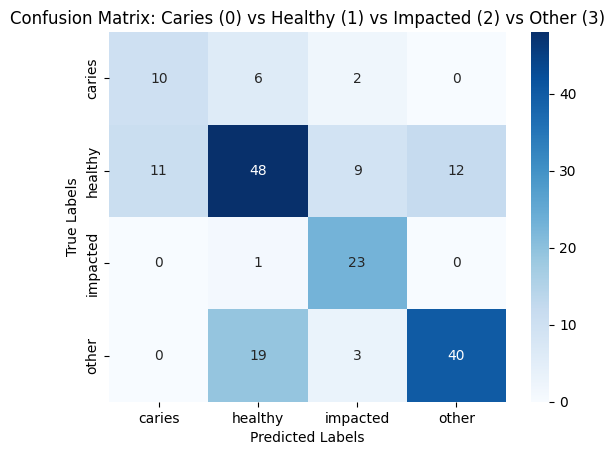

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct class names (assuming they correspond to your labels)
class_names = ['caries', 'healthy', 'impacted', 'other']  # Add the missing class

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g', xticklabels=class_names, yticklabels=class_names)

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Caries (0) vs Healthy (1) vs Impacted (2) vs Other (3)")

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Loop through the test dataset to extract ground truth and predictions
for images, labels in test_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot labels to class indices
    y_pred.extend(np.argmax(DenseNet_model.predict(images), axis=1))  # Get predicted class indices

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['caries', 'healthy', 'impacted', 'other'])

# Print classification report
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
              precision    recall  f1-score   support

      caries       0.48      0.56      0.51        18
     healthy       0.65      0.60      0.62        80
    impacted       0.62      0.96      0.75        24
       other       0.77      0.65      0.70        62

    accuracy                           0.66       184
   macro avg       0.63      0.69      0.65       184
weighted avg       0.67      0.66      0.66       184



In [ ]:
import os
from tensorflow.keras.models import save_model

# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

# Define a permanent save path in your Google Drive
save_path = "/content/drive/MyDrive/DenseNet121_Final_Training"
os.makedirs(save_path, exist_ok=True)

# Save the trained model directly to Drive
DenseNet_model.save('DenseNet121_model.h5')
model_name = "DenseNet121_model.h5"
DenseNet_model.save(os.path.join(save_path, model_name))

print(f"✅ Model saved to: {save_path}/{model_name}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Model saved to: /content/drive/MyDrive/DenseNet121_Final_Training/DenseNet121_model.h5



Vgg-19

In [ ]:
# ============ 1. Mount Google Drive ============
from google.colab import drive
import os
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import RMSprop

drive.mount('/content/drive')

# ============ 2. Define Paths ============
project_name = "VGG19_Keras_Tuning"
drive_path = "/content/drive/MyDrive"
project_path = os.path.join(drive_path, project_name)
checkpoint_dir = os.path.join(project_path, "checkpoints")
os.makedirs(checkpoint_dir, exist_ok=True)

# ============ 3. Image Input ============
img_shape = (224, 224, 3)

# ============ 4. Build Model Function ============
def build_vgg19_model(hp):
    model = models.Sequential()
    base_model = tf.keras.applications.VGG19(
        include_top=False,
        input_shape=img_shape,
        pooling='avg',
        weights='imagenet'
    )
    for layer in base_model.layers:
        layer.trainable = False
    model.add(base_model)

    model.add(layers.Dropout(hp.Float("dropout", 0.2, 0.4, step=0.1)))

    for i in range(hp.Int("num_dense_layers", 1, 5)):
        model.add(layers.Dense(
            units=hp.Int(f"dense_{i}_units", 16, 512, step=16),
            activation="relu",
            kernel_regularizer=regularizers.l2(0.001)
        ))

    model.add(layers.Dense(4, activation="softmax"))

    model.compile(
        optimizer=RMSprop(learning_rate=hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="categorical_crossentropy",
        metrics=["accuracy", tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")]
    )
    return model

# ============ 5. Resume Trial Count Logic ============
def get_existing_trials(checkpoint_dir):
    return len([f for f in os.listdir(checkpoint_dir) if f.endswith(".keras")])

completed_trials = get_existing_trials(checkpoint_dir)
max_trials = 100
remaining_trials = max_trials - completed_trials
print(f"✅ Completed Trials: {completed_trials}, Remaining Trials: {remaining_trials}")

# ============ 6. Initialize Tuner ============
tuner = kt.BayesianOptimization(
    build_vgg19_model,
    objective="val_accuracy",
    max_trials=max_trials,
    executions_per_trial=2,
    directory=project_path,
    project_name=project_name,
    overwrite=False
)

# ============ 7. Custom Callback (Only Save if val_accuracy Improves) ============
class TrialCheckpointCallback(tf.keras.callbacks.Callback):
    def __init__(self, checkpoint_dir):
        super().__init__()
        self.checkpoint_dir = checkpoint_dir
        self.best_val_acc = 0.0

    def on_trial_end(self, trial, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc and val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            trial_id = trial.trial_id.replace("trial_", "")
            filename = f"vgg19_trial_{trial_id}_valacc_{val_acc:.4f}.keras"
            filepath = os.path.join(self.checkpoint_dir, filename)
            self.model.save(filepath)
            print(f"✅ Saved (val_accuracy improved): {filename}")
        else:
            print("⚠️ No improvement in val_accuracy. Checkpoint not saved.")

# ============ 8. Callbacks ============
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, verbose=1)
trial_checkpoint_cb = TrialCheckpointCallback(checkpoint_dir)

# ============ 9. Start Tuning Search ============
if remaining_trials > 0:
    tuner.search(
        train_dataset,
        epochs=70,
        validation_data=val_dataset,
        callbacks=[stop_early, trial_checkpoint_cb]
    )
else:
    print("✅ All 100 trials already completed.")

# ============ 10. Load Best Model ============
best_hps = tuner.get_best_hyperparameters(1)[0]
VGG19_model = tuner.hypermodel.build(best_hps)
VGG19_model.summary()


Trial 100 Complete [00h 02m 42s]
val_accuracy: 0.7490842640399933

Best val_accuracy So Far: 0.8333333432674408
Total elapsed time: 06h 14m 46s


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 512)            │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,289,092 (77.40 MB)

 Trainable params: 264,708 (1.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
# Define EarlyStopping & ModelCheckpoint
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("VGG19_model.keras", save_best_only=True)

# Train the model
history = VGG19_model.fit(
    train_dataset,
    epochs=70,
    validation_data=val_dataset,
    callbacks=[checkpoint_cb, stop_early]
)



Epoch 1/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.4050 - loss: 2.4273 - precision: 0.4186 - recall: 0.3541 - val_accuracy: 0.5788 - val_loss: 1.5885 - val_precision: 0.6150 - val_recall: 0.5092
Epoch 2/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.5759 - loss: 1.6185 - precision: 0.6213 - recall: 0.5321 - val_accuracy: 0.6337 - val_loss: 1.3726 - val_precision: 0.6947 - val_recall: 0.5751
Epoch 3/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.6500 - loss: 1.3782 - precision: 0.6913 - recall: 0.5946 - val_accuracy: 0.6886 - val_loss: 1.2893 - val_precision: 0.7384 - val_recall: 0.6410
Epoch 4/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7271 - loss: 1.1959 - precision: 0.7750 - recall: 0.6840 - val_accuracy: 0.7179 - val_loss: 1.1919 - val_precision: 0.7521 - val_recall: 0.6667
Epoch 5/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.7419 - loss: 1.1251 - precision: 0.7834 - recall: 0.6901 - val_accuracy: 0.7033 - val_loss: 1

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc, test_precision, test_recall = VGG19_model.evaluate(test_dataset)

# Print evaluation metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7943 - loss: 0.9256 - precision: 0.8439 - recall: 0.7431
Test Accuracy: 0.8207
Test Precision: 0.8667
Test Recall: 0.7772


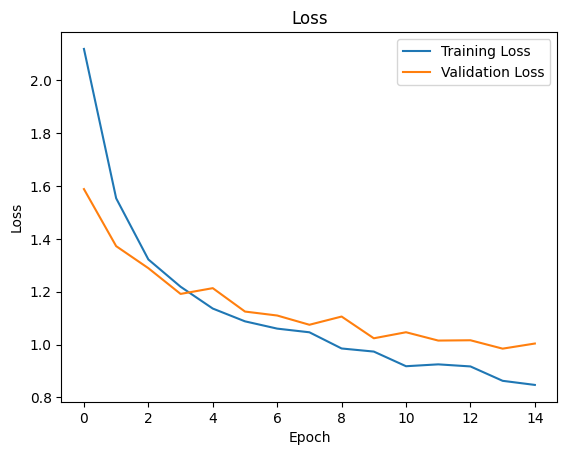

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

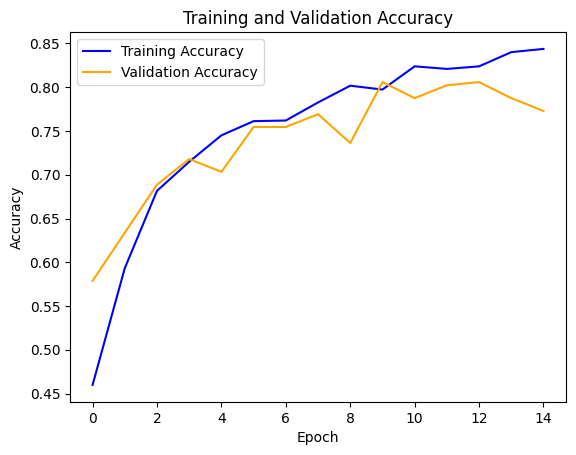

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get model predictions (probabilities)
y_pred = VGG19_model.predict(test_dataset)

# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Extract true labels from test dataset
y_test_classes = np.concatenate([np.argmax(y, axis=1) for _, y in test_dataset])

# Compute confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_mat)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step
Confusion Matrix:
 [[ 7  6  4  1]
 [ 2 73  1  4]
 [ 1  5 18  0]
 [ 1  7  1 53]]


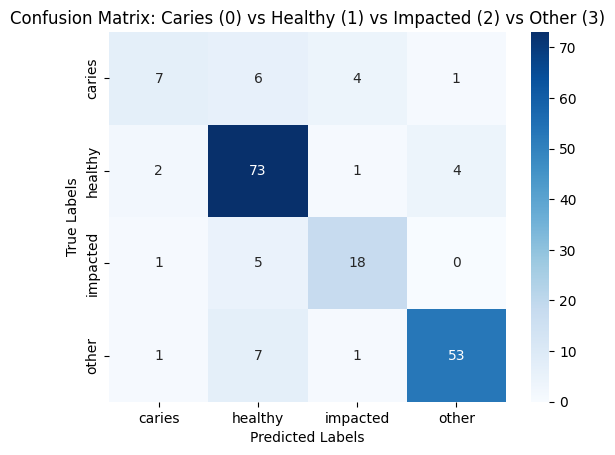

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct class names (assuming they correspond to your labels)
class_names = ['caries', 'healthy', 'impacted', 'other']  # Add the missing class

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g', xticklabels=class_names, yticklabels=class_names)

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Caries (0) vs Healthy (1) vs Impacted (2) vs Other (3)")

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Loop through the test dataset to extract ground truth and predictions
for images, labels in test_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot labels to class indices
    y_pred.extend(np.argmax(VGG19_model.predict(images), axis=1))  # Get predicted class indices

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['caries', 'healthy', 'impacted', 'other'])

# Print classification report
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step
              precision    recall  f1-score   support

      caries       0.64      0.39      0.48        18
     healthy       0.80      0.91      0.85        80
    impacted       0.75      0.75      0.75        24
       other       0.91      0.85      0.88        62

    accuracy                           0.82       184
   macro avg       0.78      0.73      0.74       184
weighted avg       0.82      0.82      0.81       184



In [ ]:
VGG19_model.save('VGG19_model.h5')

In [ ]:
import numpy as np
import pickle
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from itertools import product

# Load the uploaded models
model_1 = load_model("Cnn.h5")
model_2 = load_model("ResNet50_model.h5")
model_3 = load_model("VGG19_model.h5")

# Step 1: Get predictions from each model on the test set
model_1_preds = model_1.predict(test_dataset)
model_2_preds = model_2.predict(test_dataset)
model_3_preds = model_3.predict(test_dataset)

# Step 2: Reconstruct y_test from test_dataset
y_test_encoded = np.concatenate([y for _, y in test_dataset], axis=0)
y_true = np.argmax(y_test_encoded, axis=1)

# Step 3: Define a function to evaluate ensemble with given weights
def evaluate_ensemble(w1, w2, w3):
    ensemble_preds = w1 * model_1_preds + w2 * model_2_preds + w3 * model_3_preds
    final_preds = np.round(ensemble_preds)
    return accuracy_score(y_true, np.argmax(final_preds, axis=1))

# Step 4: Search best weights (coarse grid search)
best_acc = 0
best_weights = (0.33, 0.33, 0.34)

weight_range = np.arange(0, 1.05, 0.05)
for w1, w2 in product(weight_range, repeat=2):
    if w1 + w2 > 1:
        continue
    w3 = 1 - (w1 + w2)
    acc = evaluate_ensemble(w1, w2, w3)
    if acc > best_acc:
        best_acc = acc
        best_weights = (w1, w2, w3)

print(f"✅ Best Weights: {best_weights} → Accuracy: {best_acc:.4f}")

# Step 5: Save the best ensemble function
def best_weighted_ensemble(model_1_preds, model_2_preds, model_3_preds, weights=best_weights):
    w1, w2, w3 = weights
    ensemble_preds = w1 * model_1_preds + w2 * model_2_preds + w3 * model_3_preds
    final_preds = np.round(ensemble_preds)
    return final_preds

with open('best_weighted_ensemble.pkl', 'wb') as file:
    pickle.dump(best_weighted_ensemble, file)

# Step 6: Final predictions using best weights
final_preds = best_weighted_ensemble(model_1_preds, model_2_preds, model_3_preds)

# Step 7: Final accuracy
ensemble_accuracy = accuracy_score(y_true, np.argmax(final_preds, axis=1))
print("🎯 Final Ensemble Accuracy (Best Weights):", ensemble_accuracy)

# Step 8: Show predictions
print("🧾 Final Predictions:", np.argmax(final_preds, axis=1))
print("🧾 Ground Truth:", y_true)


6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step
✅ Best Weights: (np.float64(0.45), np.float64(0.25), np.float64(0.30000000000000004)) → Accuracy: 0.9293
🎯 Final Ensemble Accuracy (Best Weights): 0.9293478260869565
🧾 Final Predictions: [0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 0 3 1 1 1 3 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 1 2 2 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
🧾 Ground Truth: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Step 1: Reconstruct true labels from test dataset
y_test_classes = np.concatenate([np.argmax(y, axis=1) for _, y in test_dataset])

# Step 2: Get predictions from individual models (already done earlier)
# model_1_preds = model_1.predict(test_dataset)
# model_2_preds = model_2.predict(test_dataset)
# model_3_preds = model_3.predict(test_dataset)

# Step 3: Use best weights from earlier search (already defined as best_weights)
w1, w2, w3 = best_weights
ensemble_preds = w1 * model_1_preds + w2 * model_2_preds + w3 * model_3_preds

# Step 4: Get predicted class indices from ensemble
y_pred_classes = np.argmax(np.round(ensemble_preds), axis=1)

# Step 5: Compute and print confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)
print("🧾 Confusion Matrix:\n", conf_mat)


🧾 Confusion Matrix:
 [[14  4  0  0]
 [ 2 75  1  2]
 [ 0  3 21  0]
 [ 1  0  0 61]]


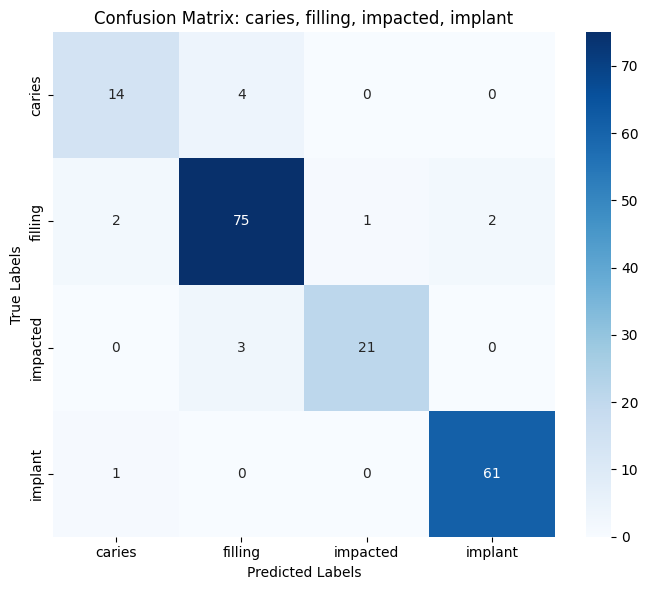

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class names
class_names = ['caries', 'filling', 'impacted', 'implant']

# Get true and predicted class indices
y_test_classes = np.concatenate([np.argmax(y, axis=1) for _, y in test_dataset])
y_pred_classes = np.argmax(np.round(ensemble_preds), axis=1)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Plot heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: caries, filling, impacted, implant")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Define class names
class_names = ['caries', 'filling', 'impacted', 'implant']

# Convert one-hot encoded labels to class indices
y_true = np.concatenate([np.argmax(y, axis=1) for _, y in test_dataset])
y_pred = np.argmax(np.round(ensemble_preds), axis=1)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


              precision    recall  f1-score   support

      caries       0.82      0.78      0.80        18
     filling       0.91      0.94      0.93        80
    impacted       0.95      0.88      0.91        24
     implant       0.97      0.98      0.98        62

    accuracy                           0.93       184
   macro avg       0.92      0.89      0.90       184
weighted avg       0.93      0.93      0.93       184



Found 1357 files belonging to 4 classes.
Found 273 files belonging to 4 classes.
Found 184 files belonging to 4 classes.


85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 124ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 469ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 335ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 472ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 393ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Validation Report:
               precision    recall  f1-score   support

      caries       0.00      0.00      0.00        36
     filling       0.46      0.96      0.62       122
    impacted       0.00      0.00      0.00        30
     implant       0.56      0.11      0.18        85

    accuracy                           0.46       273
   macro avg       0.25      0.27      0.20       273
weighted avg       0.38      0.46      0.33       273


Test Report:
               precision    recall  f1-score   support

      caries       0.00      0.00      0.00        18
     filling       0.46      1.00      0.63        80
    impacted       0.00      0.00      0.00        24
     implant       0.00      0.00      0.00        62

    accuracy                           0.43       184
   macro avg       0.11      0.25      0.16       184
weighted avg       0.20      0.43      0.27       184



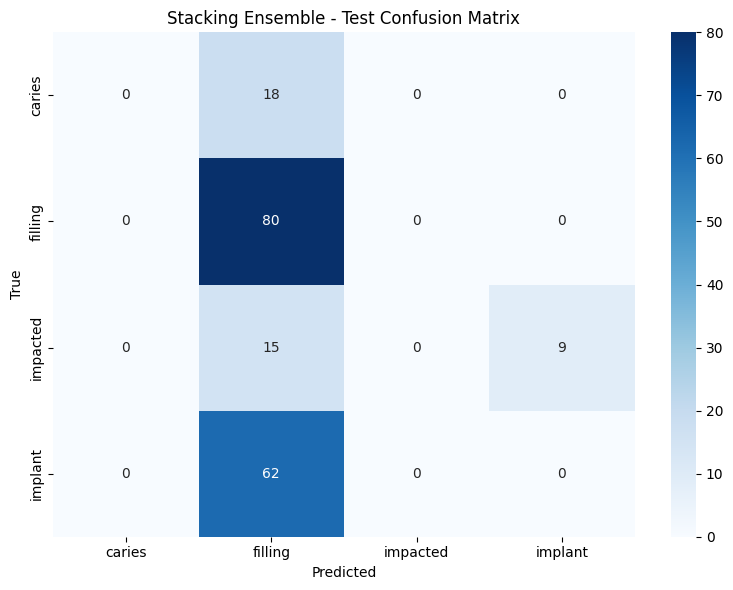

In [ ]:
# ===========================
# 1. Setup and Imports
# ===========================
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ===========================
# 2. Load Data
# ===========================
train_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Train"
val_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Val"
test_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Test"

batch_size = 16
img_size = (224, 224)

train_dataset = image_dataset_from_directory(train_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=True)
val_dataset = image_dataset_from_directory(val_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=True)
test_dataset = image_dataset_from_directory(test_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=False)

# ===========================
# 3. Load and Fine-Tune Models
# ===========================
cnn_model = load_model("model.h5")
resnet_model = load_model("ResNet50_model.h5")
vgg19_model = load_model("VGG19_model.h5")
densenet_model = load_model("DenseNet121_model.h5")

# OPTIONAL: Fine-tune last layers
for model in [resnet_model, vgg19_model, densenet_model]:
    for layer in model.layers[-20:]:
        layer.trainable = True
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# ===========================
# 4. Generate Softmax Predictions
# ===========================
def get_preds(model, dataset):
    return model.predict(dataset, batch_size=8)

cnn_train = get_preds(cnn_model, train_dataset)
resnet_train = get_preds(resnet_model, train_dataset)
vgg19_train = get_preds(vgg19_model, train_dataset)
densenet_train = get_preds(densenet_model, train_dataset)

cnn_val = get_preds(cnn_model, val_dataset)
resnet_val = get_preds(resnet_model, val_dataset)
vgg19_val = get_preds(vgg19_model, val_dataset)
densenet_val = get_preds(densenet_model, val_dataset)

cnn_test = get_preds(cnn_model, test_dataset)
resnet_test = get_preds(resnet_model, test_dataset)
vgg19_test = get_preds(vgg19_model, test_dataset)
densenet_test = get_preds(densenet_model, test_dataset)

# ===========================
# 5. Weighted Average Predictions
# ===========================
def weighted_avg(preds, weights):
    return sum(w * p for w, p in zip(weights, preds))

weights = [0.4, 0.2, 0.2, 0.2]
weighted_train = weighted_avg([cnn_train, resnet_train, vgg19_train, densenet_train], weights)
weighted_val = weighted_avg([cnn_val, resnet_val, vgg19_val, densenet_val], weights)
weighted_test = weighted_avg([cnn_test, resnet_test, vgg19_test, densenet_test], weights)

# ===========================
# 6. Prepare Meta Features
# ===========================
X_train_meta = np.concatenate([cnn_train, resnet_train, vgg19_train, densenet_train, weighted_train], axis=1)
X_val_meta = np.concatenate([cnn_val, resnet_val, vgg19_val, densenet_val, weighted_val], axis=1)
X_test_meta = np.concatenate([cnn_test, resnet_test, vgg19_test, densenet_test, weighted_test], axis=1)

# ===========================
# 7. Labels
# ===========================
y_train = np.concatenate([np.argmax(y, axis=1) for _, y in train_dataset])
y_val = np.concatenate([np.argmax(y, axis=1) for _, y in val_dataset])
y_test = np.concatenate([np.argmax(y, axis=1) for _, y in test_dataset])

# ===========================
# 8. Meta-Learner
# ===========================
meta_learner = LogisticRegression(max_iter=1000)
meta_learner.fit(X_train_meta, y_train)

# ===========================
# 9. Evaluation
# ===========================
val_preds = meta_learner.predict(X_val_meta)
test_preds = meta_learner.predict(X_test_meta)

class_names = ['caries', 'filling', 'impacted', 'implant']

print("\nValidation Report:\n", classification_report(y_val, val_preds, target_names=class_names))
print("\nTest Report:\n", classification_report(y_test, test_preds, target_names=class_names))

# ===========================
# 10. Confusion Matrix
# ===========================
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Stacking Ensemble - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


Found 1357 files belonging to 4 classes.
Found 273 files belonging to 4 classes.
Found 184 files belonging to 4 classes.


85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step

✅ Validation Report:
               precision    recall  f1-score   support

      caries       0.00      0.00      0.00        36
     filling       0.44      0.83      0.58       122
    impacted       0.00      0.00      0.00        30
     implant       0.34      0.15      0.21        85

    accuracy                           0.42       273
   macro avg       0.20      0.25      0.20       273
weighted avg       0.30      0.42      0.32       273


✅ Test Report:
               precision    recall  f1-score   support

      caries       0.83      0.28      0.42        18
     filling       0.62      0.97      0.76        80


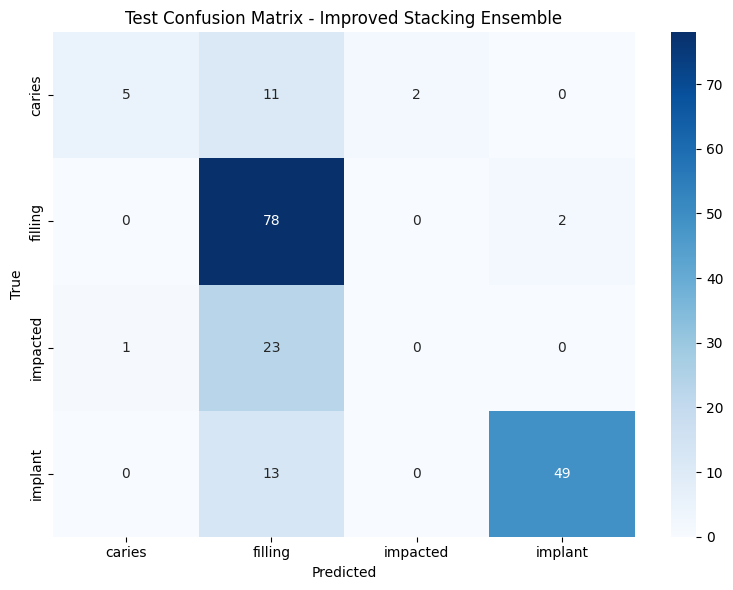

In [ ]:
# ===========================
# Improved Stacking Ensemble with Argmax Features
# ===========================
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ===========================
# Load Data
# ===========================
train_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Train"
val_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Val"
test_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Test"

batch_size = 16
img_size = (224, 224)

train_dataset = image_dataset_from_directory(train_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=True)
val_dataset = image_dataset_from_directory(val_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=True)
test_dataset = image_dataset_from_directory(test_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=False)

# ===========================
# Load Base Models
# ===========================
cnn_model = load_model("model.h5")
resnet_model = load_model("ResNet50_model.h5")
vgg19_model = load_model("VGG19_model.h5")

# ===========================
# Get Argmax Predictions for Meta-Features
# ===========================
def get_argmax_preds(model, dataset):
    return np.argmax(model.predict(dataset, batch_size=8), axis=1).reshape(-1, 1)

cnn_train = get_argmax_preds(cnn_model, train_dataset)
resnet_train = get_argmax_preds(resnet_model, train_dataset)
vgg19_train = get_argmax_preds(vgg19_model, train_dataset)

cnn_val = get_argmax_preds(cnn_model, val_dataset)
resnet_val = get_argmax_preds(resnet_model, val_dataset)
vgg19_val = get_argmax_preds(vgg19_model, val_dataset)

cnn_test = get_argmax_preds(cnn_model, test_dataset)
resnet_test = get_argmax_preds(resnet_model, test_dataset)
vgg19_test = get_argmax_preds(vgg19_model, test_dataset)

# ===========================
# Meta Features
# ===========================
X_train_meta = np.concatenate([cnn_train, resnet_train, vgg19_train], axis=1)
X_val_meta = np.concatenate([cnn_val, resnet_val, vgg19_val], axis=1)
X_test_meta = np.concatenate([cnn_test, resnet_test, vgg19_test], axis=1)

# ===========================
# Ground Truth Labels
# ===========================
y_train = np.concatenate([np.argmax(y, axis=1) for _, y in train_dataset])
y_val = np.concatenate([np.argmax(y, axis=1) for _, y in val_dataset])
y_test = np.concatenate([np.argmax(y, axis=1) for _, y in test_dataset])

# ===========================
# Meta-Learner: Random Forest
# ===========================
meta_learner = RandomForestClassifier(n_estimators=100, random_state=42)
meta_learner.fit(X_train_meta, y_train)

# ===========================
# Predictions and Evaluation
# ===========================
val_preds = meta_learner.predict(X_val_meta)
test_preds = meta_learner.predict(X_test_meta)

class_names = ['caries', 'filling', 'impacted', 'implant']

print("\n✅ Validation Report:\n", classification_report(y_val, val_preds, target_names=class_names))
print("\n✅ Test Report:\n", classification_report(y_test, test_preds, target_names=class_names))

# ===========================
# Confusion Matrix
# ===========================
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Test Confusion Matrix - Improved Stacking Ensemble")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

Found 1357 files belonging to 4 classes.
Found 184 files belonging to 4 classes.


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

✅ Test Report:
               precision    recall  f1-score   support

      caries       0.74      0.78      0.76        18
     filling       0.87      0.90      0.88        80
    impacted       0.88      0.88      0.88        24
     implant       0.97      0.90      0

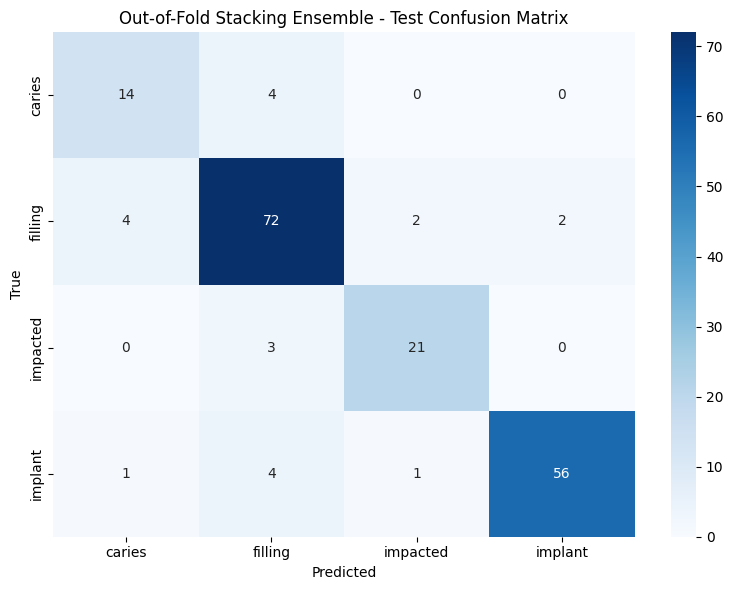

In [ ]:
# ===========================
# Out-of-Fold Stacking Ensemble (No Leakage)
# ===========================
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# Load Data
# ===========================
train_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Train"
test_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Test"

batch_size = 16
img_size = (224, 224)

train_dataset = image_dataset_from_directory(train_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=False)
test_dataset = image_dataset_from_directory(test_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=False)

# ===========================
# Load Base Models
# ===========================
cnn_model = load_model("model.h5")
resnet_model = load_model("ResNet50_model.h5")
vgg19_model = load_model("VGG19_model.h5")

base_models = [cnn_model, resnet_model, vgg19_model]

# ===========================
# Extract All Train Images and Labels
# ===========================
train_images = []
train_labels = []
for x, y in train_dataset:
    train_images.append(x.numpy())
    train_labels.append(y.numpy())
train_images = np.concatenate(train_images, axis=0)
train_labels = np.argmax(np.concatenate(train_labels, axis=0), axis=1)

# ===========================
# Out-of-Fold Meta Features Generation
# ===========================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
meta_features = []

for model in base_models:
    oof_preds = np.zeros((len(train_images),))
    for train_idx, val_idx in kf.split(train_images):
        x_train_fold, x_val_fold = train_images[train_idx], train_images[val_idx]
        y_train_fold, y_val_fold = train_labels[train_idx], train_labels[val_idx]

        # Re-train a copy of the model
        model_copy = tf.keras.models.clone_model(model)
        model_copy.set_weights(model.get_weights())
        model_copy.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model_copy.fit(x_train_fold, y_train_fold, epochs=3, batch_size=16, verbose=0)

        preds = np.argmax(model_copy.predict(x_val_fold, batch_size=8), axis=1)
        oof_preds[val_idx] = preds
    meta_features.append(oof_preds.reshape(-1, 1))

X_meta_train = np.concatenate(meta_features, axis=1)
y_meta_train = train_labels

# ===========================
# Prepare Meta Test Features
# ===========================
test_images = []
test_labels = []
for x, y in test_dataset:
    test_images.append(x.numpy())
    test_labels.append(y.numpy())
test_images = np.concatenate(test_images, axis=0)
y_test = np.argmax(np.concatenate(test_labels, axis=0), axis=1)

X_meta_test = []
for model in base_models:
    preds = np.argmax(model.predict(test_images, batch_size=8), axis=1).reshape(-1, 1)
    X_meta_test.append(preds)
X_meta_test = np.concatenate(X_meta_test, axis=1)

# ===========================
# Train Meta-Learner
# ===========================
meta_learner = RandomForestClassifier(n_estimators=100, random_state=42)
meta_learner.fit(X_meta_train, y_meta_train)
final_preds = meta_learner.predict(X_meta_test)

# ===========================
# Evaluate
# ===========================
class_names = ['caries', 'filling', 'impacted', 'implant']
print("\n✅ Test Report:\n", classification_report(y_test, final_preds, target_names=class_names))

cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Out-of-Fold Stacking Ensemble - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

✅ Test Accuracy: 88.59%

🧾 Test Classification Report:
              precision    recall  f1-score   support

      caries       0.74      0.78      0.76        18
     filling       0.87      0.90      0.88        80
    impacted       0.88      0.88      0.88        24
     implant       0.97      0.90      0.93        62

    accuracy                           0.89       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.89      0.89      0.89       184



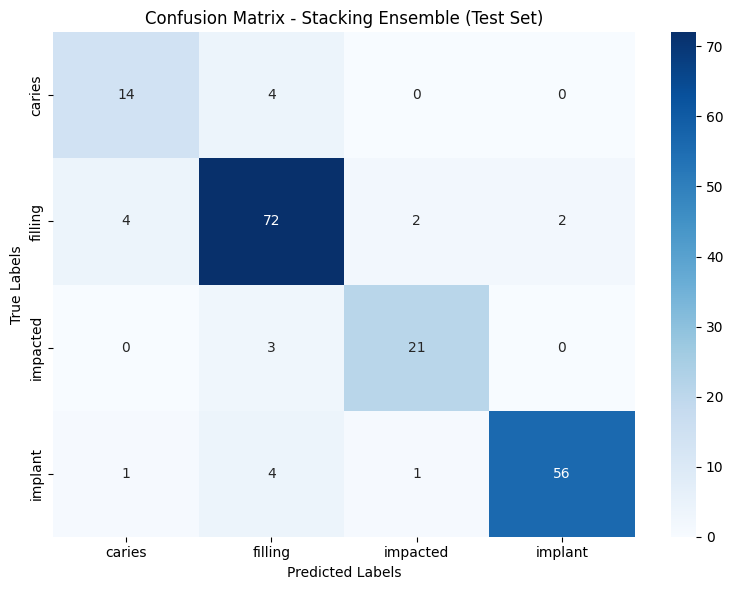

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert one-hot encoded y_test to class indices (already done in previous code)
# y_test and final_preds already exist

# Define class names
class_names = ['caries', 'filling', 'impacted', 'implant']

# Calculate accuracy
test_accuracy = accuracy_score(y_test, final_preds)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report
print("\n🧾 Test Classification Report:")
print(classification_report(y_test, final_preds, target_names=class_names))

# Confusion matrix
test_cm = confusion_matrix(y_test, final_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Stacking Ensemble (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


Found 1357 files belonging to 4 classes.
Found 184 files belonging to 4 classes.


170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

✅ Test Classification Report:
               precision    recall  f1-score   support

      caries       0.67      0.44      0.53        18
     filling       0.88      0.89      0.88        80
    impacted       0.83      0.83      0.83        24
     implant       0.85      0.92      0.88        62

    accuracy                           0.85       184
   macro avg       0.81      0.77      0.78       184
weighted avg       0.84      0.85      0.84       184



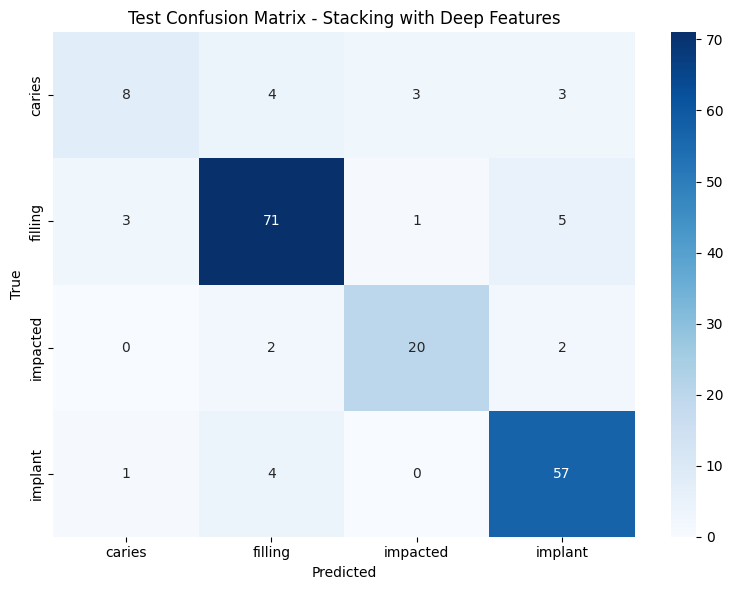

In [ ]:
# ===========================
# Stacking Ensemble with Deep Intermediate Features (Sequential Safe Fix)
# ===========================
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# Load Data
# ===========================
train_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Train"
test_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Test"

batch_size = 16
img_size = (224, 224)

train_dataset = image_dataset_from_directory(train_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=False)
test_dataset = image_dataset_from_directory(test_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=False)

# ===========================
# Load Base Models
# ===========================
cnn_model = load_model("model.h5")
resnet_model = load_model("ResNet50_model.h5")
vgg19_model = load_model("VGG19_model.h5")

# ===========================
# Extract Raw Images and Labels
# ===========================
def extract_images_and_labels(dataset):
    images, labels = [], []
    for x, y in dataset:
        images.append(x.numpy())
        labels.append(y.numpy())
    return np.concatenate(images, axis=0), np.argmax(np.concatenate(labels, axis=0), axis=1)

train_images, y_train = extract_images_and_labels(train_dataset)
test_images, y_test = extract_images_and_labels(test_dataset)

# ===========================
# Extract Intermediate Feature Models (safe slicing for Sequential)
# ===========================
cnn_feat_model = tf.keras.Sequential(cnn_model.layers[:-2])
resnet_feat_model = tf.keras.Sequential(resnet_model.layers[:-2])
vgg19_feat_model = tf.keras.Sequential(vgg19_model.layers[:-2])

# ===========================
# Generate Intermediate Features
# ===========================
cnn_train_feat = cnn_feat_model.predict(train_images, batch_size=8)
resnet_train_feat = resnet_feat_model.predict(train_images, batch_size=8)
vgg19_train_feat = vgg19_feat_model.predict(train_images, batch_size=8)

cnn_test_feat = cnn_feat_model.predict(test_images, batch_size=8)
resnet_test_feat = resnet_feat_model.predict(test_images, batch_size=8)
vgg19_test_feat = vgg19_feat_model.predict(test_images, batch_size=8)

# ===========================
# Combine into Meta Features
# ===========================
X_train_meta = np.concatenate([cnn_train_feat, resnet_train_feat, vgg19_train_feat], axis=1)
X_test_meta = np.concatenate([cnn_test_feat, resnet_test_feat, vgg19_test_feat], axis=1)

# ===========================
# Train Meta-Learner
# ===========================
meta_learner = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
meta_learner.fit(X_train_meta, y_train)
final_preds = meta_learner.predict(X_test_meta)

# ===========================
# Evaluation
# ===========================
class_names = ['caries', 'filling', 'impacted', 'implant']
print("\n✅ Test Classification Report:\n", classification_report(y_test, final_preds, target_names=class_names))

cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Test Confusion Matrix - Stacking with Deep Features")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


✅ Test Accuracy: 84.78%

🧾 Test Classification Report:
              precision    recall  f1-score   support

      caries       0.67      0.44      0.53        18
     filling       0.88      0.89      0.88        80
    impacted       0.83      0.83      0.83        24
     implant       0.85      0.92      0.88        62

    accuracy                           0.85       184
   macro avg       0.81      0.77      0.78       184
weighted avg       0.84      0.85      0.84       184



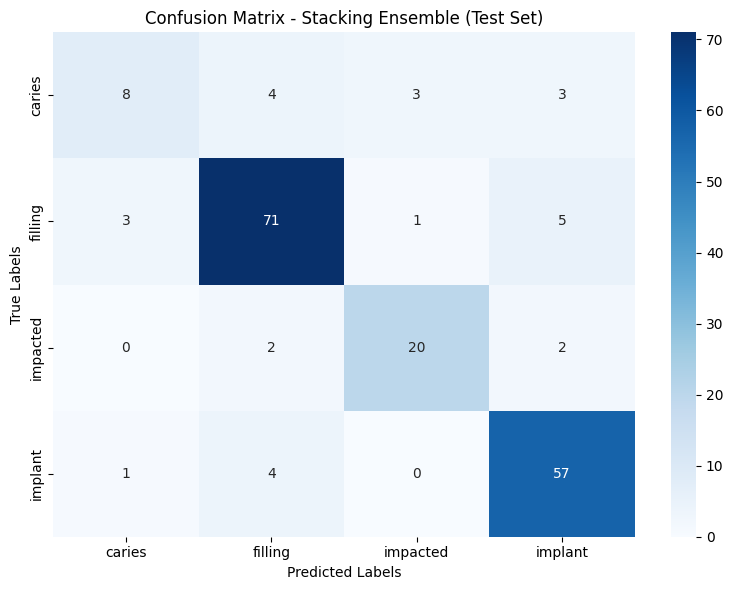

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert one-hot encoded y_test to class indices (already done in previous code)
# y_test and final_preds already exist

# Define class names
class_names = ['caries', 'filling', 'impacted', 'implant']

# Calculate accuracy
test_accuracy = accuracy_score(y_test, final_preds)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report
print("\n🧾 Test Classification Report:")
print(classification_report(y_test, final_preds, target_names=class_names))

# Confusion matrix
test_cm = confusion_matrix(y_test, final_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Stacking Ensemble (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


Found 1357 files belonging to 4 classes.
Found 184 files belonging to 4 classes.


170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:17:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Test Classification Report:
               precision    recall  f1-score   support

      caries       0.73      0.61      0.67        18
     filling       0.89      0.91      0.90        80
    impacted       0.88      0.88      0.88        24
     implant       0.90      0.92      0.91        62

    accuracy                           0.88       184
   macro avg       0.85      0.83      0.84       184
weighted avg       0.88      0.88      0.88       184



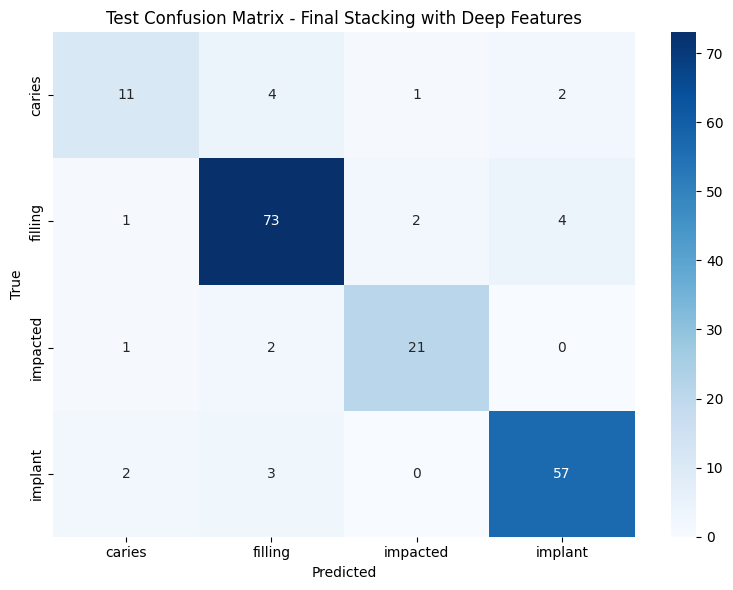

In [ ]:
# ===========================
# Final Stacking Ensemble with Sliced Sequential Feature Extraction
# ===========================
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# ===========================
# Load Data
# ===========================
train_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Train"
test_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Test"

batch_size = 16
img_size = (224, 224)

train_dataset = image_dataset_from_directory(train_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=False)
test_dataset = image_dataset_from_directory(test_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=False)

# ===========================
# Load Base Models
# ===========================
cnn_model = load_model("model.h5")
resnet_model = load_model("ResNet50_model.h5")

# ===========================
# Extract Raw Images and Labels
# ===========================
def extract_images_and_labels(dataset):
    images, labels = [], []
    for x, y in dataset:
        images.append(x.numpy())
        labels.append(y.numpy())
    return np.concatenate(images, axis=0), np.argmax(np.concatenate(labels, axis=0), axis=1)

train_images, y_train = extract_images_and_labels(train_dataset)
test_images, y_test = extract_images_and_labels(test_dataset)

# ===========================
# Use Sliced Sequential to Get Intermediate Feature Models
# ===========================
cnn_feat_model = tf.keras.Sequential(cnn_model.layers[:-1])
resnet_feat_model = tf.keras.Sequential(resnet_model.layers[:-1])

# ===========================
# Generate Deep Features
# ===========================
cnn_train_feat = cnn_feat_model.predict(train_images, batch_size=8)
resnet_train_feat = resnet_feat_model.predict(train_images, batch_size=8)

cnn_test_feat = cnn_feat_model.predict(test_images, batch_size=8)
resnet_test_feat = resnet_feat_model.predict(test_images, batch_size=8)

# ===========================
# Concatenate Meta Features
# ===========================
X_train_meta = np.concatenate([cnn_train_feat, resnet_train_feat], axis=1)
X_test_meta = np.concatenate([cnn_test_feat, resnet_test_feat], axis=1)

# ===========================
# Normalize Features
# ===========================
scaler = StandardScaler()
X_train_meta = scaler.fit_transform(X_train_meta)
X_test_meta = scaler.transform(X_test_meta)

# ===========================
# Train Meta-Learner (XGBoost)
# ===========================
meta_learner = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, use_label_encoder=False, eval_metric='mlogloss')
meta_learner.fit(X_train_meta, y_train)
final_preds = meta_learner.predict(X_test_meta)

# ===========================
# Evaluation
# ===========================
class_names = ['caries', 'filling', 'impacted', 'implant']
print("\n✅ Test Classification Report:\n", classification_report(y_test, final_preds, target_names=class_names))

cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Test Confusion Matrix - Final Stacking with Deep Features")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


✅ Test Accuracy: 88.04%

🧾 Test Classification Report:
              precision    recall  f1-score   support

      caries       0.73      0.61      0.67        18
     filling       0.89      0.91      0.90        80
    impacted       0.88      0.88      0.88        24
     implant       0.90      0.92      0.91        62

    accuracy                           0.88       184
   macro avg       0.85      0.83      0.84       184
weighted avg       0.88      0.88      0.88       184



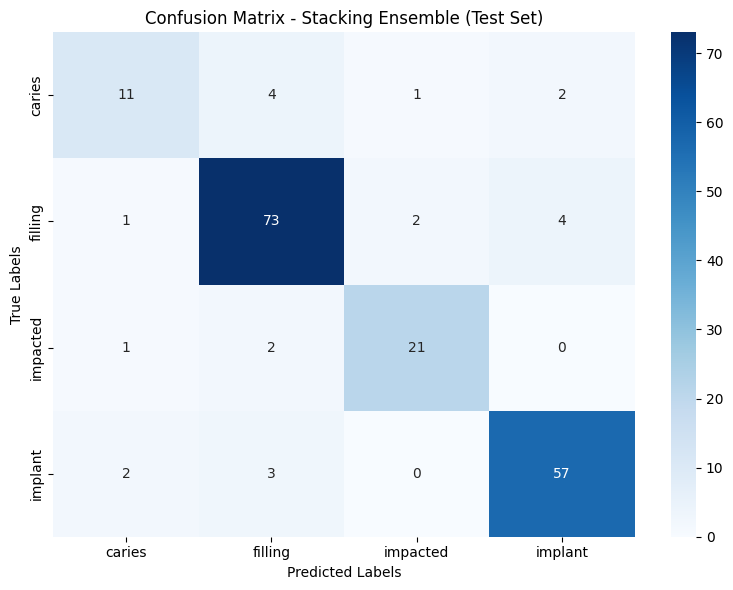

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert one-hot encoded y_test to class indices (already done in previous code)
# y_test and final_preds already exist

# Define class names
class_names = ['caries', 'filling', 'impacted', 'implant']

# Calculate accuracy
test_accuracy = accuracy_score(y_test, final_preds)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report
print("\n🧾 Test Classification Report:")
print(classification_report(y_test, final_preds, target_names=class_names))

# Confusion matrix
test_cm = confusion_matrix(y_test, final_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Stacking Ensemble (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
cnn_model = load_model("Cnn.h5")
resnet_model = load_model("ResNet50_model.h5")
vgg_model = load_model("VGG19_model.h5")
# Get probability predictions from your pretrained models
cnn_probs = cnn_model.predict(test_dataset)
vgg_probs = vgg_model.predict(test_dataset)
resnet_probs = resnet_model.predict(test_dataset)

# Step 1: Get predictions and accuracies
cnn_pred = np.argmax(cnn_probs, axis=1)
vgg_pred = np.argmax(vgg_probs, axis=1)
resnet_pred = np.argmax(resnet_probs, axis=1)
y_test_encoded = np.concatenate([y for _, y in test_dataset], axis=0)
y_true = np.argmax(y_test_encoded, axis=1)

# Step 2: Compute accuracies on test set (or validation set)
cnn_acc = accuracy_score(y_true, cnn_pred)
vgg_acc = accuracy_score(y_true, vgg_pred)
resnet_acc = accuracy_score(y_true, resnet_pred)

# Step 3: Convert accuracies to weights (like boosting alphas)
eps = 1e-10  # Avoid divide by zero
cnn_alpha = np.log((cnn_acc + eps) / (1 - cnn_acc + eps))
vgg_alpha = np.log((vgg_acc + eps) / (1 - vgg_acc + eps))
resnet_alpha = np.log((resnet_acc + eps) / (1 - resnet_acc + eps))

# Step 4: Weighted sum of predictions
weighted_probs = (
    cnn_alpha * cnn_probs +
    vgg_alpha * vgg_probs +
    resnet_alpha * resnet_probs
)

# Final prediction
y_pred = np.argmax(weighted_probs, axis=1)

# Accuracy of the boosting-inspired ensemble
final_acc = accuracy_score(y_true, y_pred)
print("Boosting-style Ensemble Accuracy:", final_acc)


6/6 ━━━━━━━━━━━━━━━━━━━━ 85s 12s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Boosting-style Ensemble Accuracy: 0.907608695652174


In [9]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# Load Data
# ===========================
train_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Train"
test_dir = "/content/drive/MyDrive/Cropped_Rf_data_resolution/Test"

batch_size = 16
img_size = (224, 224)

train_dataset = image_dataset_from_directory(train_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=False)
test_dataset = image_dataset_from_directory(test_dir, label_mode="categorical", image_size=img_size, batch_size=batch_size, shuffle=False)

# ===========================
# Load Base Models
# ===========================
cnn_model = load_model("Cnn.h5")
resnet_model = load_model("ResNet50_model.h5")
vgg19_model = load_model("VGG19_model.h5")

base_models = [cnn_model, resnet_model, vgg19_model]

# ===========================
# Extract All Train Images and Labels
# ===========================
train_images = []
train_labels = []
for x, y in train_dataset:
    train_images.append(x.numpy())
    train_labels.append(y.numpy())
train_images = np.concatenate(train_images, axis=0)
train_labels = np.argmax(np.concatenate(train_labels, axis=0), axis=1)

# ===========================
# Out-of-Fold Meta Features Generation
# ===========================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
meta_features = []

for model in base_models:
    oof_preds = np.zeros((len(train_images),))
    for train_idx, val_idx in kf.split(train_images):
        x_train_fold, x_val_fold = train_images[train_idx], train_images[val_idx]
        y_train_fold, y_val_fold = train_labels[train_idx], train_labels[val_idx]

        # Re-train a copy of the model
        model_copy = tf.keras.models.clone_model(model)
        model_copy.set_weights(model.get_weights())
        model_copy.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model_copy.fit(x_train_fold, y_train_fold, epochs=3, batch_size=16, verbose=0)

        preds = np.argmax(model_copy.predict(x_val_fold, batch_size=8), axis=1)
        oof_preds[val_idx] = preds
    meta_features.append(oof_preds.reshape(-1, 1))

X_meta_train = np.concatenate(meta_features, axis=1)
y_meta_train = train_labels

# ===========================
# Prepare Meta Test Features
# ===========================
test_images = []
test_labels = []
for x, y in test_dataset:
    test_images.append(x.numpy())
    test_labels.append(y.numpy())
test_images = np.concatenate(test_images, axis=0)
y_test = np.argmax(np.concatenate(test_labels, axis=0), axis=1)

X_meta_test = []
for model in base_models:
    preds = np.argmax(model.predict(test_images, batch_size=8), axis=1).reshape(-1, 1)
    X_meta_test.append(preds)
X_meta_test = np.concatenate(X_meta_test, axis=1)

# ===========================
# Train Meta-Learner
# ===========================
clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_meta_train, y_meta_train)



Found 1357 files belonging to 4 classes.
Found 184 files belonging to 4 classes.


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:865: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:871: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)

In [20]:
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_meta_train, y_meta_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_meta_test)))

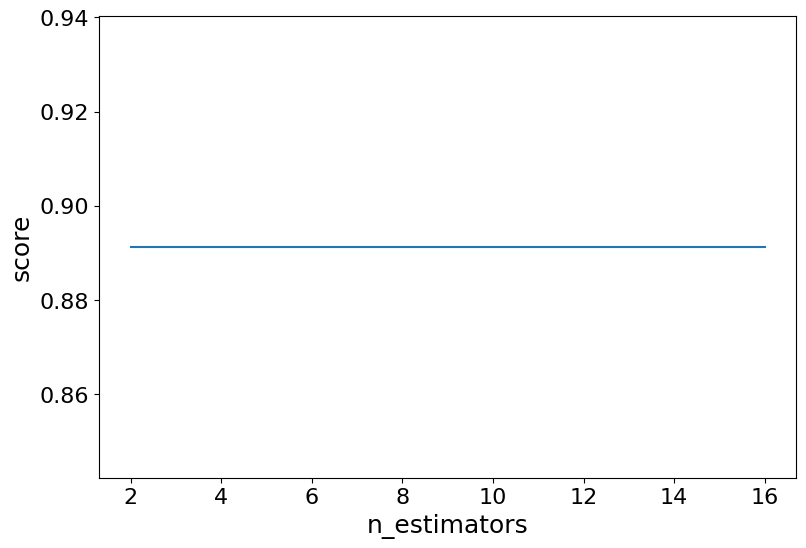

In [21]:
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


✅ Test Classification Report:
               precision    recall  f1-score   support

      caries       0.76      0.72      0.74        18
     filling       0.87      0.90      0.88        80
    impacted       0.91      0.88      0.89        24
     implant       0.95      0.94      0.94        62

    accuracy                           0.89       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.89      0.89      0.89       184



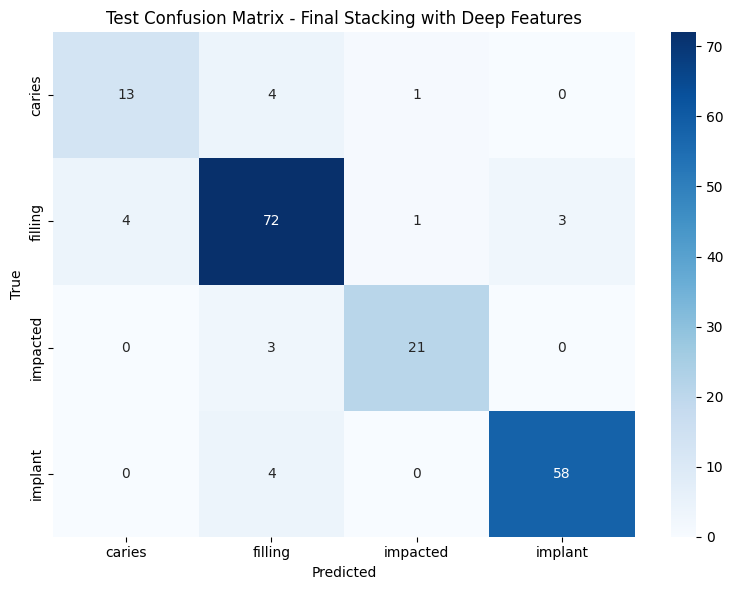

In [22]:

final_preds = clf.predict(X_meta_test)

# ===========================
# Evaluation
# ===========================
class_names = ['caries', 'filling', 'impacted', 'implant']
print("\n✅ Test Classification Report:\n", classification_report(y_test, final_preds, target_names=class_names))

cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Test Confusion Matrix - Final Stacking with Deep Features")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

✅ Test Accuracy: 89.13%

🧾 Test Classification Report:
              precision    recall  f1-score   support

      caries       0.76      0.72      0.74        18
     filling       0.87      0.90      0.88        80
    impacted       0.91      0.88      0.89        24
     implant       0.95      0.94      0.94        62

    accuracy                           0.89       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.89      0.89      0.89       184



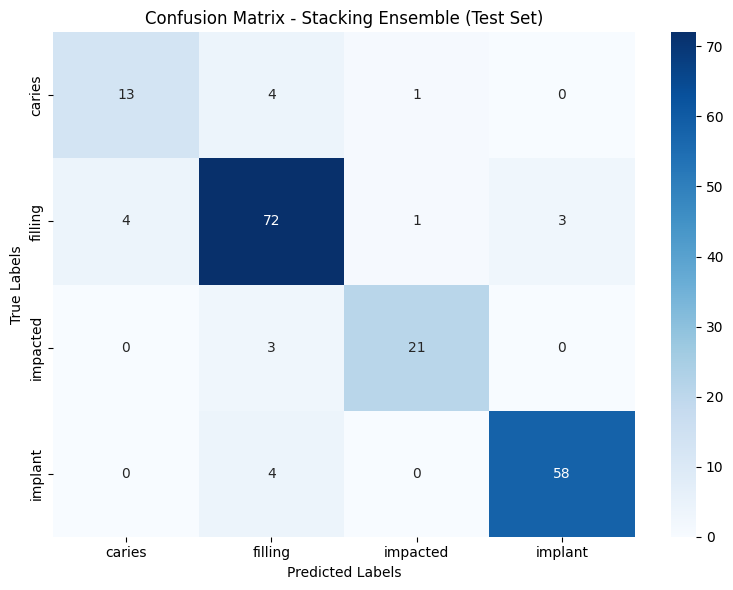

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert one-hot encoded y_test to class indices (already done in previous code)
# y_test and final_preds already exist

# Define class names
class_names = ['caries', 'filling', 'impacted', 'implant']

# Calculate accuracy
test_accuracy = accuracy_score(y_test, final_preds)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report
print("\n🧾 Test Classification Report:")
print(classification_report(y_test, final_preds, target_names=class_names))

# Confusion matrix
test_cm = confusion_matrix(y_test, final_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Bagging Ensemble (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_meta_train,y_meta_train)

y_pred = dtree.predict(X_meta_test)


✅ Test Classification Report:
               precision    recall  f1-score   support

      caries       0.76      0.72      0.74        18
     filling       0.87      0.90      0.88        80
    impacted       0.91      0.88      0.89        24
     implant       0.95      0.94      0.94        62

    accuracy                           0.89       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.89      0.89      0.89       184



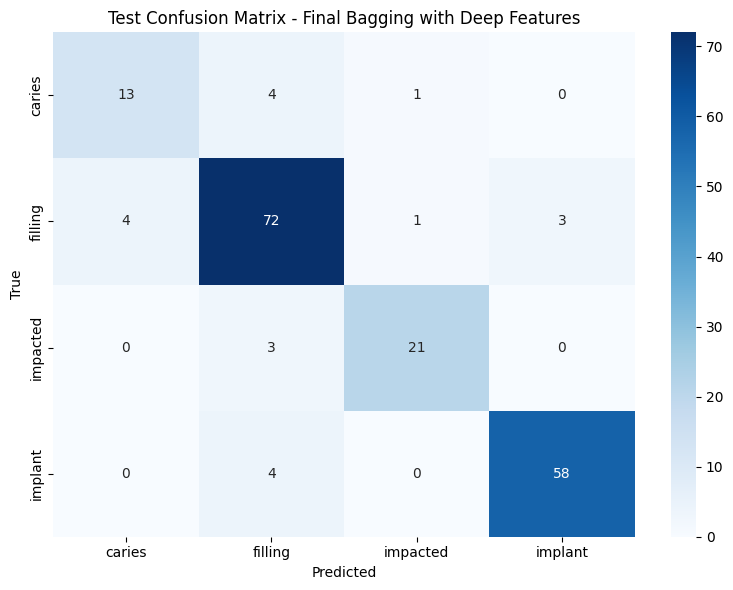

In [29]:
final_preds = dtree.predict(X_meta_test)

# ===========================
# Evaluation
# ===========================
class_names = ['caries', 'filling', 'impacted', 'implant']
print("\n✅ Test Classification Report:\n", classification_report(y_test, final_preds, target_names=class_names))

cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Test Confusion Matrix - Final Bagging with Deep Features")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

✅ Test Accuracy: 89.13%

🧾 Test Classification Report:
              precision    recall  f1-score   support

      caries       0.76      0.72      0.74        18
     filling       0.87      0.90      0.88        80
    impacted       0.91      0.88      0.89        24
     implant       0.95      0.94      0.94        62

    accuracy                           0.89       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.89      0.89      0.89       184



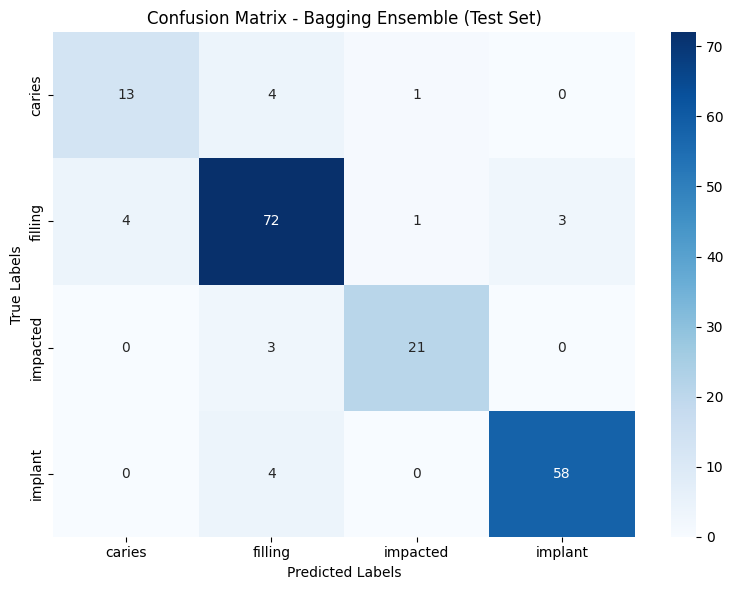

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert one-hot encoded y_test to class indices (already done in previous code)
# y_test and final_preds already exist

# Define class names
class_names = ['caries', 'filling', 'impacted', 'implant']

# Calculate accuracy
test_accuracy = accuracy_score(y_test, final_preds)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report
print("\n🧾 Test Classification Report:")
print(classification_report(y_test, final_preds, target_names=class_names))

# Confusion matrix
test_cm = confusion_matrix(y_test, final_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Bagging Ensemble (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()